## Final Project - Data Analysis and Visualization

**Group Members:**
- Benjamin Francis Abadila
- Angelo Dela Paz
- Carl Mitzchel Padua
- Edjin Jerney Payumo
- Levin Jacob Sta. Cruz

---
### I. Data Ingestion

In [1]:
%matplotlib inline

### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Optimization
import optuna


#### A. Data Loading

In [2]:
# Loading the 2023 FIES Dataset
fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

C:\Users\edjin\AppData\Local\Temp\ipykernel_4600\2210770801.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


#### B. Preliminary Data Inspection

In [3]:
# Displaying the first 10 rows of the dataset
pd.set_option('display.max_columns', None)
fies_23.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.0,0,0,0,0,0,0,0,0,0,0,0,0,18830.0,57120.0,46820.0,2540.0,1734.0,2410.0,8000.0,1835.0,2244.0,0.0,2250.0,0.0,0.0,1950.0,1820.0,0.0,0.0,0.0,0.0,0,0,147553.0,14000.0,161553.0,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.0,607070.0,228942.0,228942.0,0,607070.0,2,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.0,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.0,50206.0,43405.0,12500.0,2340.0,4710.0,12115.0,1230.0,2930.0,702.0,5025.0,0.0,960.0,5850.0,6162.0,0.0,1950.0,0.0,0.0,0,0,184458.0,12800.0,197258.0,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.0,411980.0,363077.0,363677.0,0,411980.0,2,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.0,0,0,0,0,0,0,0,0,0,0,0,0,27770.0,54160.0,36440.0,11955.0,2364.0,5360.0,13805.0,1470.0,2580.0,0.0,1860.0,0.0,0.0,3900.0,3120.0,0.0,0.0,0.0,0.0,0,0,164784.0,11500.0,176284.0,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.0,818212.0,516477.0,559186.0,0,818212.0,2,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.0,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.0,21220.0,20380.0,10490.0,1836.0,2780.0,8240.0,1060.0,1586.0,552.0,1910.0,0.0,0.0,2550.0,1820.0,0.0,0.0,0.0,0.0,0,0,92696.0,10000.0,102696.0,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.0,258538.0,180438.0,180438.0,0,258538.0,2,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.0,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.0,64250.0,45770.0,3320.0,1056.0,2020.0,7145.0,1150.0,2140.0,552.0,2130.0,0.0,0.0,3900.0,2730.0,0.0,0.0,0.0,0.0,0,0,163183.0,8000.0,171183.0,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.0,550724.0,390438.0,436962.0,2000,552724.0,2,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,0,0,0,0,0,0,140,2530.0,0,0,0,0,80800,0,0,72000,0,0,152800,0,29402.0,45529.0,24450.0,9086.0,1870.0,2460.0,10265.0,3800.0,2687.0,552.0,2250.0,0.0,1886.0,4550.0,3640.0,0.0,0.0,0.0,0.0,0,0,142427.0,19800.0,162227.0,2090,65160,0,18000,0,18000,8886,4050,27730,13494,4250,500,6000,10630,2500,0,0,16200,0,145290.0,353470.0,307517.0,323717.0,0,353470.0,2,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,23000,9000,0,24000,0,0,280,40675.0,45600,0,0,0,0,0,0,0,0,0,45600,0,21707.0,37808.0,23000.0,16050.0,2394.0,3795.0,10635.0,2120.0,5247.0,0.0,1350.0,0.0,0.0,3250.0,3850.0,0.0,1124.0,0.0,0.0,0,0,131206.0,13800.0,145006.0,1550,44500,0,21000,0,21000,9416,32602,15760,7200,4000,0,0,9666,48000,0,0,0,0,173818.0,344555.0,318824.0,318824.0,3200,347755.0,2,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,14000,6000,0,0,0,0,800,3085.0,24850,0,0,0,0,0,106440,0,0,0,131290,0,18972.0,24270.0,26380.0,1416.0,942.0,1185.0,8105.0,1090.0,141

In [4]:
# Displaying the shape of the dataset
fies_23.shape

(163268, 90)

In [5]:
# Displaying the columns of the dataset
fies_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [6]:
# Displaying the data types of the columns and the number of non-null values
fies_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

`Observation:` All the columns have the same rows and no non-null data were found. All columns are also numeric (int64/float64) except for the `TOTDIS` column which is `object` dtype

In [7]:
# Displaying the summary statistics of the dataset
fies_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.343821,45.666328,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,1.625567e+04,2.087703e+03,261.068783,8.917411e+03,9.279524e+02,334.375260,3147.782842,6.229320e+03,1.349645e+04,2.298986e+03,4.626744e+03,387.405021,2.544389e+04,2.398009e+03,6.584374e+03,5.824782e+03,3.672963e+02,3.758046e+02,6.181191e+04,8.169978,27286.062891,16053.257366,14394.006695,6144.197778,1712.811002,4601.016959,7037.525935,2141.598779,4130.657394,711.642792,2217.816260,122.737804,438.272914,1900.274496,1187.452304,79.535181,1279.174387,1983.709162,67.003924,19.450805,1.171387,9.015887e+04,11548.751406,1.017076e+05,4.900740e+03,5.409333e+04,3.653566e+03,2.801967e+04,8.943057e+01,3.176266e+04,6.315285e+03,6.971786e+03,1.581311e+04,7888.639139,1.988345e+03,8.202996e+03,6376.147353,9065.431358,5.097815e+03,6275.710347,4.889744e+03,2.743421e+04,218.148829,1.414477e+05,3.321473e+05,2.431553e+05,1.010574e+04,3.422530e+05,573.167081,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,4.753706,24.759798,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,2.991219e+04,2.482738e+04,3388.956853,6.055216e+04,6.751070e+04,5839.103922,6381.121388,2.155790e+04,4.460068e+04,4.009795e+04,2.985207e+04,5000.560669,2.251064e+05,3.531579e+04,3.467995e+04,8.237168e+04,1.672914e+04,1.802239e+04,2.660405e+05,738.982873,12875.671564,13694.003058,10333.798670,6312.403759,1549.350682,4226.019431,5509.888624,2031.424024,6184.097005,1149.474516,2066.748378,518.245413,1170.879435,2127.917027,1353.817982,550.259214,2686.722445,4540.873882,489.885721,226.289097,68.121341,4.494110e+04,19540.102473,5.493516e+04,7.662093e+03,5.933142e+04,1.790243e+04,4.143742e+04,6.836886e+03,4.422733e+04,1.575241e+04,2.631806e+04,2.123939e+04,8947.522999,9.025928e+03,2.421281e+04,17194.193854,10490.738724,3.698498e+04,13899.963545,2.659590e+04,1.752157e+05

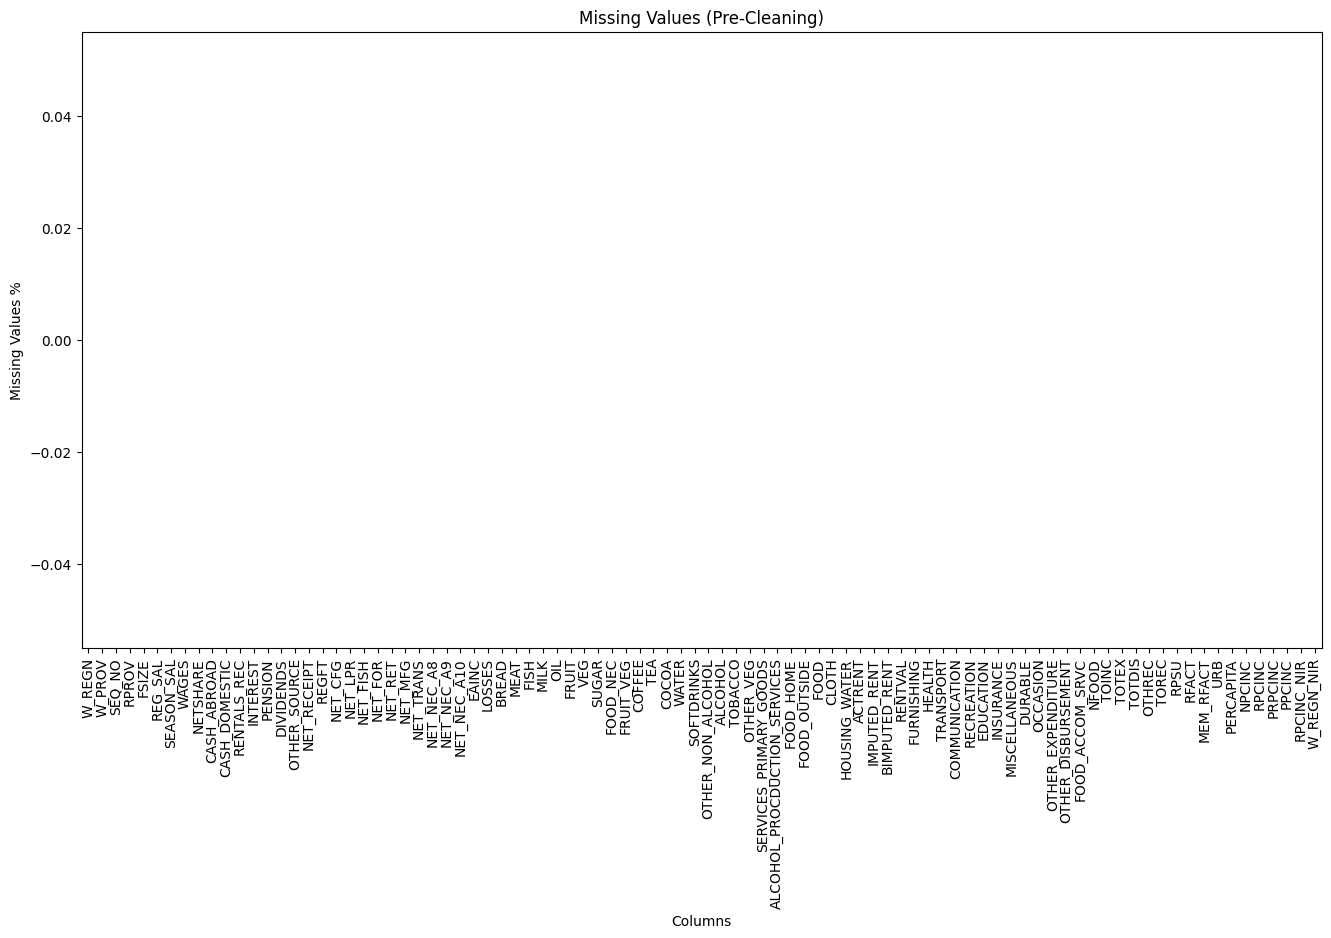

In [8]:
### Displaying the missing values in the dataset

# Calculating the Missing Values % contribution in DF
df_null = round(100*(fies_23.isnull().sum())/len(fies_23), 2)

# Plotting the df_null
plt.figure(figsize=(16,8))
sns.barplot(x=df_null.index, y=df_null.values, alpha=0.8)
plt.title('Missing Values (Pre-Cleaning)')
plt.ylabel('Missing Values %')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

> No missing values were identified

In [9]:
# Identifying duplicate rows using `duplicated()` method
duplicate_rows = fies_23[fies_23.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [10]:
# Identifying duplicate rows by comparing total rows with unique rows
total_rows = fies_23.shape[0]
unique_rows = fies_23.drop_duplicates().shape[0]
duplicate_rows = total_rows - unique_rows

print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows: {duplicate_rows}")


Total rows: 163268
Unique rows: 163268
Duplicate rows: 0


> No duplicate values were identified

In [11]:
# Identify column that are non-numeric
fies_23.describe(include='O')

,TOTDIS
count,163268
unique,144056
top,
freq,7732


`'TOTDIS'` is the only column with dataype `object`, it should also be numerical like the rest

---
### II. Data Preprocessing

#### A. Data Cleaning

Correcting Data Types

In [12]:
print("Column Dtype: ",fies_23['TOTDIS'].dtype)
print("Total Rows", fies_23['TOTDIS'].count())
print("Unique Rows",fies_23['TOTDIS'].nunique())

pd.to_numeric(fies_23['TOTDIS'], errors='coerce')
invalid_values = fies_23['TOTDIS'][pd.to_numeric(fies_23['TOTDIS'], errors='coerce').isna()]
print(invalid_values.unique())

Column Dtype:  object
Total Rows 163268
Unique Rows 144056
['           ']


`Observation:` Despite having no actual missing values, the `TOTDIS` column contains rows that only have empty strings or whitespaces ' ' which may have caused it to become object Dtype

In [13]:
whitespace_rows = fies_23['TOTDIS'].str.strip().eq('')
print("Rows with only empty whitespaces: ", whitespace_rows.sum())


Rows with only empty whitespaces:  7732


> `TOTDIS` contains 7732 rows with whitespaces. However, these could be resolved since `TOTDIS` = `TOTEX` + `OTHER_DISBURSEMENT`

In [14]:
# Dropping Unnecessary Columns
cleaned_fies = fies_23.copy()

In [15]:
### Verify that `TOTDIS` = `TOTEX` + `OTHER_DISBURSEMENT`

# Replace whitespace or empty strings with NaN
cleaned_fies['TOTDIS'] = cleaned_fies['TOTDIS'].replace(r'^\s*$', np.nan, regex=True)
cleaned_fies['TOTDIS'] = pd.to_numeric(cleaned_fies['TOTDIS'], errors='coerce')

# Compute a temporary 'TOTDIS' column for verification
temp_cleaned_fies = cleaned_fies.copy()
temp_cleaned_fies['CALC_TOTDIS'] = cleaned_fies['TOTEX'] + cleaned_fies['OTHER_DISBURSEMENT']

# Identify rows where the computed value differs from the existing value
discrepancies = temp_cleaned_fies[temp_cleaned_fies['TOTDIS'].round() != temp_cleaned_fies['CALC_TOTDIS'].round()]
print(f"Number of discrepancies: {discrepancies.shape[0]}")

discrepancies[['TOTEX', 'OTHER_DISBURSEMENT', 'TOTDIS', 'CALC_TOTDIS']]

Number of discrepancies: 7732


,TOTEX,OTHER_DISBURSEMENT,TOTDIS,CALC_TOTDIS
47648,42479.0,0,NaN,42479.0
47649,185212.0,0,NaN,185212.0
47650,198966.0,0,NaN,198966.0
47651,62612.0,15000,NaN,77612.0
47652,234514.0,0,NaN,234514.0
...,...,...,...,...
148931,177394.0,84000,NaN,261394.0
148932,1453596.0,0,NaN,1453596.0
148933,251941.0,0,NaN,251941.0
148934,117032.0,0,NaN,117032.0


> Since the only discrepancies are the rows missing values. We can clean the data by recomputing their 'TOTDIS'

In [16]:
cleaned_fies['TOTDIS'] = cleaned_fies['TOTEX'] + cleaned_fies['OTHER_DISBURSEMENT']
cleaned_fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

> The `'TOTDIS'` column now have 0 null values and have correct Dtype

#### B. Exploratory Data Analysis

In [17]:
cleaned_fies.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [18]:
cleaned_fies.shape

(163268, 90)

##### Column Aggregation

> Given the large number of columns `[90]` in the dataset, we will remove some of those that serve as components of aggregated columns to simplify the dataset for analysis and model training. Prior to this, we will verify which columns contribute to the aggregated columns to ensure accurate removal.

In [19]:
def check_aggregation(
    dataframe, components, aggregated_column, negative_components=None, temp_column_name="TEMP_SUM", tolerance=0.01
):
    # Validate input columns
    all_columns = components + (negative_components if negative_components else []) + [aggregated_column]
    missing_columns = [col for col in all_columns if col not in dataframe.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in the DataFrame: {missing_columns}")

    temp_df = dataframe.copy()

    # Calculate the sum of positive components
    temp_df[temp_column_name] = temp_df[components].sum(axis=1)

    # Subtract negative components if provided
    if negative_components:
        temp_df[temp_column_name] -= temp_df[negative_components].sum(axis=1)

    # Compare the aggregated column with the computed sum within tolerance
    temp_df['MATCH'] = (dataframe[aggregated_column] - temp_df[temp_column_name]).abs() <= tolerance

    # Identify mismatched rows
    mismatched_rows = temp_df[~temp_df['MATCH']]

    # Output results
    if mismatched_rows.empty:
        result = f"The '{aggregated_column}' column is correctly aggregated from its components."
    else:
        result = f"Number of mismatched rows: {len(mismatched_rows)}"

    return mismatched_rows, result


In [20]:
# List of possible component columns
components = [
    'REG_SAL', 'SEASON_SAL'
]

loss_components = []
aggregate_column = 'WAGES'

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM'] + components])
else:
    Wages_components = components

Wages_components

The 'WAGES' column is correctly aggregated from its components.


['REG_SAL', 'SEASON_SAL']

In [21]:
# List of possible component columns
components = [
    'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 
    'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 
    'NET_NEC_A9', 'NET_NEC_A10', 'LOSSES'
]

loss_components = []
aggregate_column = 'EAINC'

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM'] + components])
else:
    EAINC_components = components

EAINC_components

The 'EAINC' column is correctly aggregated from its components.


['NET_CFG',
 'NET_LPR',
 'NET_FISH',
 'NET_FOR',
 'NET_RET',
 'NET_MFG',
 'NET_TRANS',
 'NET_NEC_A8',
 'NET_NEC_A9',
 'NET_NEC_A10',
 'LOSSES']

In [22]:
# List of possible component columns
components = [
    'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 
    'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT',
    'IMPUTED_RENT', 'EAINC'
]

loss_components = []
aggregate_column = 'TOINC'

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    TOINC_components = components

TOINC_components


The 'TOINC' column is correctly aggregated from its components.


['WAGES',
 'NETSHARE',
 'CASH_ABROAD',
 'CASH_DOMESTIC',
 'RENTALS_REC',
 'INTEREST',
 'PENSION',
 'DIVIDENDS',
 'OTHER_SOURCE',
 'NET_RECEIPT',
 'REGFT',
 'IMPUTED_RENT',
 'EAINC']

In [23]:
# List of possible component columns
components = [
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC',
    'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL'
]

loss_components = []
aggregate_column = 'FOOD_HOME'

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    FOOD_HOME_components = components

FOOD_HOME_components

The 'FOOD_HOME' column is correctly aggregated from its components.


['BREAD',
 'MEAT',
 'FISH',
 'MILK',
 'OIL',
 'FRUIT',
 'VEG',
 'SUGAR',
 'FOOD_NEC',
 'FRUIT_VEG',
 'COFFEE',
 'TEA',
 'COCOA',
 'WATER',
 'SOFTDRINKS',
 'OTHER_NON_ALCOHOL']

In [24]:
# List of possible component columns
components = [
    'FOOD_HOME', 'FOOD_OUTSIDE'
]

aggregate_column = 'FOOD'
loss_components = []

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    FOOD_components = components

FOOD_components

The 'FOOD' column is correctly aggregated from its components.


['FOOD_HOME', 'FOOD_OUTSIDE']

In [25]:
# List of possible component columns
components = [
    'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 
    'ALCOHOL_PROCDUCTION_SERVICES', 'CLOTH', 'HOUSING_WATER', 
    'FURNISHING', 'HEALTH','TRANSPORT',  'COMMUNICATION', 'RECREATION',
    'EDUCATION','INSURANCE','MISCELLANEOUS', 'DURABLE','OCCASION',
    'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC',
]

aggregate_column = 'NFOOD'
loss_components = []

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    NFOOD_components = components

NFOOD_components

The 'NFOOD' column is correctly aggregated from its components.


['ALCOHOL',
 'TOBACCO',
 'OTHER_VEG',
 'SERVICES_PRIMARY_GOODS',
 'ALCOHOL_PROCDUCTION_SERVICES',
 'CLOTH',
 'HOUSING_WATER',
 'FURNISHING',
 'HEALTH',
 'TRANSPORT',
 'COMMUNICATION',
 'RECREATION',
 'EDUCATION',
 'INSURANCE',
 'MISCELLANEOUS',
 'DURABLE',
 'OCCASION',
 'OTHER_EXPENDITURE',
 'FOOD_ACCOM_SRVC']

In [26]:
# List of possible component columns
components = [
    'FOOD', 'NFOOD'
]

aggregate_column = 'TOTEX'
loss_components = []

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    TOTEX_components = components

TOTEX_components

The 'TOTEX' column is correctly aggregated from its components.


['FOOD', 'NFOOD']

In [27]:
# List of possible component columns
components = [
    'TOTEX', 'OTHER_DISBURSEMENT'
]

aggregate_column = 'TOTDIS'
loss_components = []

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    TOTDIS_components = components

TOTDIS_components

The 'TOTDIS' column is correctly aggregated from its components.


['TOTEX', 'OTHER_DISBURSEMENT']

In [28]:
# List of possible component columns
components = [
    'TOINC', 'OTHREC'
]

aggregate_column = 'TOREC'
loss_components = []

# Call the function verify the aggregated column
mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column, negative_components=loss_components)

# Display the result
print(result)

# If there are mismatches, display them
if not mismatched_rows.empty:
    print("Mismatched rows:")
    print(mismatched_rows[[aggregate_column, 'TEMP_SUM']])
else:
    TOREC_components = components

TOREC_components

The 'TOREC' column is correctly aggregated from its components.


['TOINC', 'OTHREC']

In [29]:
# Get all column names of the cleaned_fies DataFrame
cleaned_fies_columns = cleaned_fies.columns.tolist()

# Print the list of column names
print("Complete columns in cleaned_fies:", cleaned_fies_columns)

# Printing the component lists for each aggregated column
print("WAGES components:", Wages_components)
print("EAINC components:", EAINC_components)
print("TOINC components:", TOINC_components)
print("FOOD_HOME components:", FOOD_HOME_components)
print("FOOD components:", FOOD_components)
print("NFOOD components:", NFOOD_components)
print("TOTEX components:", TOTEX_components)
print("TOTDIS components:", TOTDIS_components)
print("TOREC components:", TOREC_components)


Complete columns in cleaned_fies: ['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT', 'FOOD_ACCOM_SRVC', 'NFOOD', 'TOINC', 'TOTEX', 'TOTDIS', 'O

In [30]:
dataset_hierarchy = {
    "W_REGN": None,
    "W_PROV": None,
    "SEQ_NO": None,
    "RPROV": None,
    "FSIZE": None,
    "TOREC": {
        "TOINC": {
            "WAGES": {
                "REG_SAL": None,
                "SEASON_SAL": None
            },
            "NETSHARE": None,
            "CASH_ABROAD": None,
            "CASH_DOMESTIC": None,
            "RENTALS_REC": None,
            "INTEREST": None,
            "PENSION": None,
            "DIVIDENDS": None,
            "OTHER_SOURCE": None,
            "NET_RECEIPT": None,
            "REGFT": None,
            "IMPUTED_RENT": None,
            "EAINC": {
                "NET_CFG": None,
                "NET_LPR": None,
                "NET_FISH": None,
                "NET_FOR": None,
                "NET_RET": None,
                "NET_MFG": None,
                "NET_TRANS": None,
                "NET_NEC_A8": None,
                "NET_NEC_A9": None,
                "NET_NEC_A10": None,
                "LOSSES": None
            }
        },
        "OTHREC": None
    },
    "TOTDIS": {
        "TOTEX": {
            "FOOD": {
                "FOOD_HOME": {
                    "BREAD": None,
                    "MEAT": None,
                    "FISH": None,
                    "MILK": None,
                    "OIL": None,
                    "FRUIT": None,
                    "VEG": None,
                    "SUGAR": None,
                    "FOOD_NEC": None,
                    "FRUIT_VEG": None,
                    "COFFEE": None,
                    "TEA": None,
                    "COCOA": None,
                    "WATER": None,
                    "SOFTDRINKS": None,
                    "OTHER_NON_ALCOHOL": None
                },
                "FOOD_OUTSIDE": None
            },
            "NFOOD": {
                "ALCOHOL": None,
                "TOBACCO": None,
                "OTHER_VEG": None,
                "SERVICES_PRIMARY_GOODS": None,
                "ALCOHOL_PROCDUCTION_SERVICES": None,
                "CLOTH": None,
                "HOUSING_WATER": None,
                "FURNISHING": None,
                "HEALTH": None,
                "TRANSPORT": None,
                "COMMUNICATION": None,
                "RECREATION": None,
                "EDUCATION": None,
                "INSURANCE": None,
                "MISCELLANEOUS": None,
                "DURABLE": None,
                "OCCASION": None,
                "OTHER_EXPENDITURE": None,
                "FOOD_ACCOM_SRVC": None
            }
        },
        "OTHER_DISBURSEMENT": None
    },
    "RPSU": None,
    "RFACT": None,
    "MEM_RFACT": None,
    "URB": None,
    "PERCAPITA": None,
    "NPCINC": None,
    "RPCINC": None,
    "PRPCINC": None,
    "PPCINC": None,
    "RPCINC_NIR": None,
    "W_REGN_NIR": None
}


In [31]:
# Function to extract names and parents from hierarchical data
def extract_hierarchy(data, parent="Root"):
    names = []
    parents = []
    for key, value in data.items():
        names.append(key)
        parents.append(parent)
        if isinstance(value, dict):
            child_names, child_parents = extract_hierarchy(value, key)
            names.extend(child_names)
            parents.extend(child_parents)
    return names, parents

# Extract names and parents from the dataset hierarchy
names, parents = extract_hierarchy({
    "W_REGN": None,
    "W_PROV": None,
    "SEQ_NO": None,
    "RPROV": None,
    "FSIZE": None,
    "TOREC": {
        "TOINC": {
            "WAGES": {
                "REG_SAL": None,
                "SEASON_SAL": None
            },
            "NETSHARE": None,
            "CASH_ABROAD": None,
            "CASH_DOMESTIC": None,
            "RENTALS_REC": None,
            "INTEREST": None,
            "PENSION": None,
            "DIVIDENDS": None,
            "OTHER_SOURCE": None,
            "NET_RECEIPT": None,
            "REGFT": None,
            "IMPUTED_RENT": None,
            "EAINC": {
                "NET_CFG": None,
                "NET_LPR": None,
                "NET_FISH": None,
                "NET_FOR": None,
                "NET_RET": None,
                "NET_MFG": None,
                "NET_TRANS": None,
                "NET_NEC_A8": None,
                "NET_NEC_A9": None,
                "NET_NEC_A10": None,
                "LOSSES": None
            }
        },
        "OTHREC": None
    },
    "TOTDIS": {
        "TOTEX": {
            "FOOD": {
                "FOOD_HOME": {
                    "BREAD": None,
                    "MEAT": None,
                    "FISH": None,
                    "MILK": None,
                    "OIL": None,
                    "FRUIT": None,
                    "VEG": None,
                    "SUGAR": None,
                    "FOOD_NEC": None,
                    "FRUIT_VEG": None,
                    "COFFEE": None,
                    "TEA": None,
                    "COCOA": None,
                    "WATER": None,
                    "SOFTDRINKS": None,
                    "OTHER_NON_ALCOHOL": None
                },
                "FOOD_OUTSIDE": None
            },
            "NFOOD": {
                "ALCOHOL": None,
                "TOBACCO": None,
                "OTHER_VEG": None,
                "SERVICES_PRIMARY_GOODS": None,
                "ALCOHOL_PROCDUCTION_SERVICES": None,
                "CLOTH": None,
                "HOUSING_WATER": None,
                "FURNISHING": None,
                "HEALTH": None,
                "TRANSPORT": None,
                "COMMUNICATION": None,
                "RECREATION": None,
                "EDUCATION": None,
                "INSURANCE": None,
                "MISCELLANEOUS": None,
                "DURABLE": None,
                "OCCASION": None,
                "OTHER_EXPENDITURE": None,
                "FOOD_ACCOM_SRVC": None
            }
        },
        "OTHER_DISBURSEMENT": None
    },
    "RPSU": None,
    "RFACT": None,
    "MEM_RFACT": None,
    "URB": None,
    "PERCAPITA": None,
    "NPCINC": None,
    "RPCINC": None,
    "PRPCINC": None,
    "PPCINC": None,
    "RPCINC_NIR": None,
    "W_REGN_NIR": None
})

# Create the treemap visualization
fig = px.treemap(
    names=names,
    parents=parents,
    title="Hierarchy of Columns in FIES Dataset",
    color_discrete_sequence=["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

)
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    width=1400,  # Set the width of the figure
    height=800,  # Set the height of the figure
    margin=dict(t=50, l=25, r=25, b=25)  # Adjust the margins if needed
)
fig.show()

##### Analysis of Aggregated Columns

In [32]:
# Get all column names of the cleaned_fies DataFrame
cleaned_fies_columns = cleaned_fies.columns.tolist()

# Print the list of column names
print("Complete columns in cleaned_fies:", cleaned_fies_columns)

# Printing the component lists for each aggregated column
print("WAGES components:", Wages_components)
print("EAINC components:", EAINC_components)
print("TOINC components:", TOINC_components)
print("FOOD_HOME components:", FOOD_HOME_components)
print("FOOD components:", FOOD_components)
print("NFOOD components:", NFOOD_components)
print("TOTEX components:", TOTEX_components)
print("TOTDIS components:", TOTDIS_components)
print("TOREC components:", TOREC_components)


Complete columns in cleaned_fies: ['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT', 'FOOD_ACCOM_SRVC', 'NFOOD', 'TOINC', 'TOTEX', 'TOTDIS', 'O

In [33]:
def plot_correlation_heatmap(dataframe, aggregated_column, components):
    # Subset the dataframe
    subset = dataframe[[aggregated_column] + components]
    
    # Calculate the correlation matrix
    correlation_matrix = subset.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title(f'Correlation Grid: {aggregated_column} and Its Components')
    plt.tight_layout()
    plt.show()

In [34]:
def plot_grouped_bar_chart_average(dataframe, components, group_by_column):
    # Calculate average values for components grouped by the specified column
    averages = dataframe.groupby(group_by_column)[components].mean().reset_index()
    
    # Melt the dataframe for easier plotting
    melted = averages.melt(id_vars=[group_by_column], 
                           value_vars=components, 
                           var_name='Component', 
                           value_name='Average Value')
    
    # Plot the grouped bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted, x=group_by_column, y='Average Value', hue='Component', palette='viridis')
    plt.title('Average Values of Components by Group')
    plt.ylabel('Average Value')
    plt.xlabel(group_by_column)
    plt.legend(title='Component')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


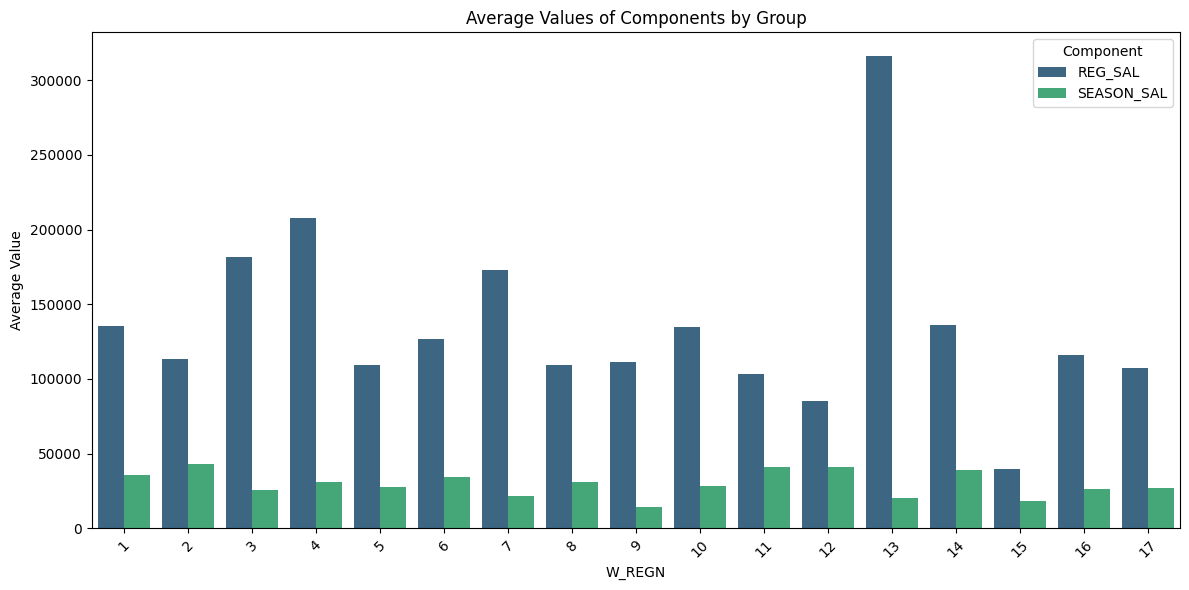

In [35]:
# Define the aggregated column and its components
aggregated_col = 'WAGES'
components_list = Wages_components

# Call the function
plot_grouped_bar_chart_average(cleaned_fies, components_list, group_by_column='W_REGN')


> W_REGN 13 or the National Capital Region has the highest average value for regular salary followed by W_REGN 4 and 3 which are CALABARZON and Central Luzon respectively

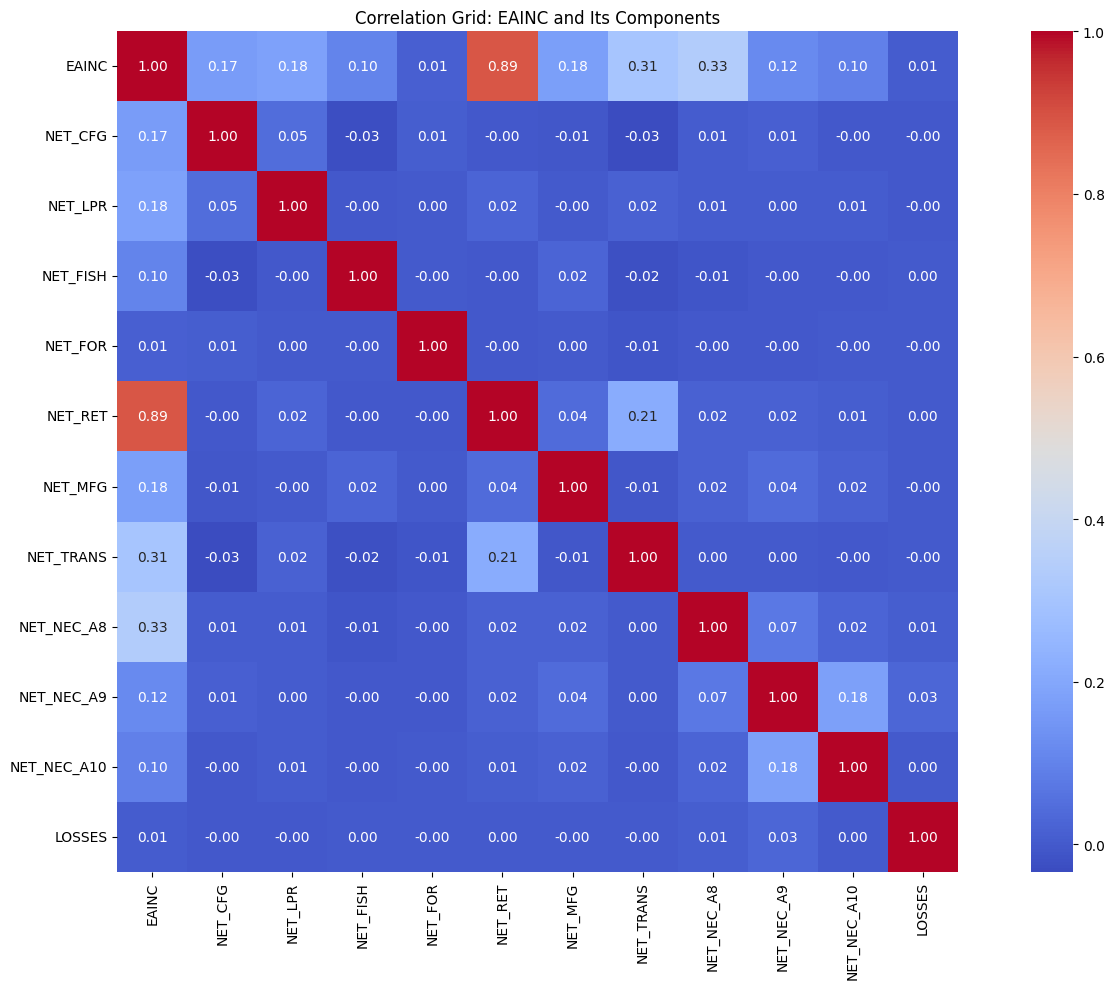

In [36]:
# Define the aggregated column and its components
aggregated_col = 'EAINC'
components_list = EAINC_components

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list)


>  Based on the correlation heatmap, the Net Value for Whole Sale and Retail `NET_RET` has the most significant impact on the total income from Entrepreneurial Activities `EAINC`. Some notable factors are the Transportation and Storage Services `NET_TRANS` and`NET_NEC_A8`

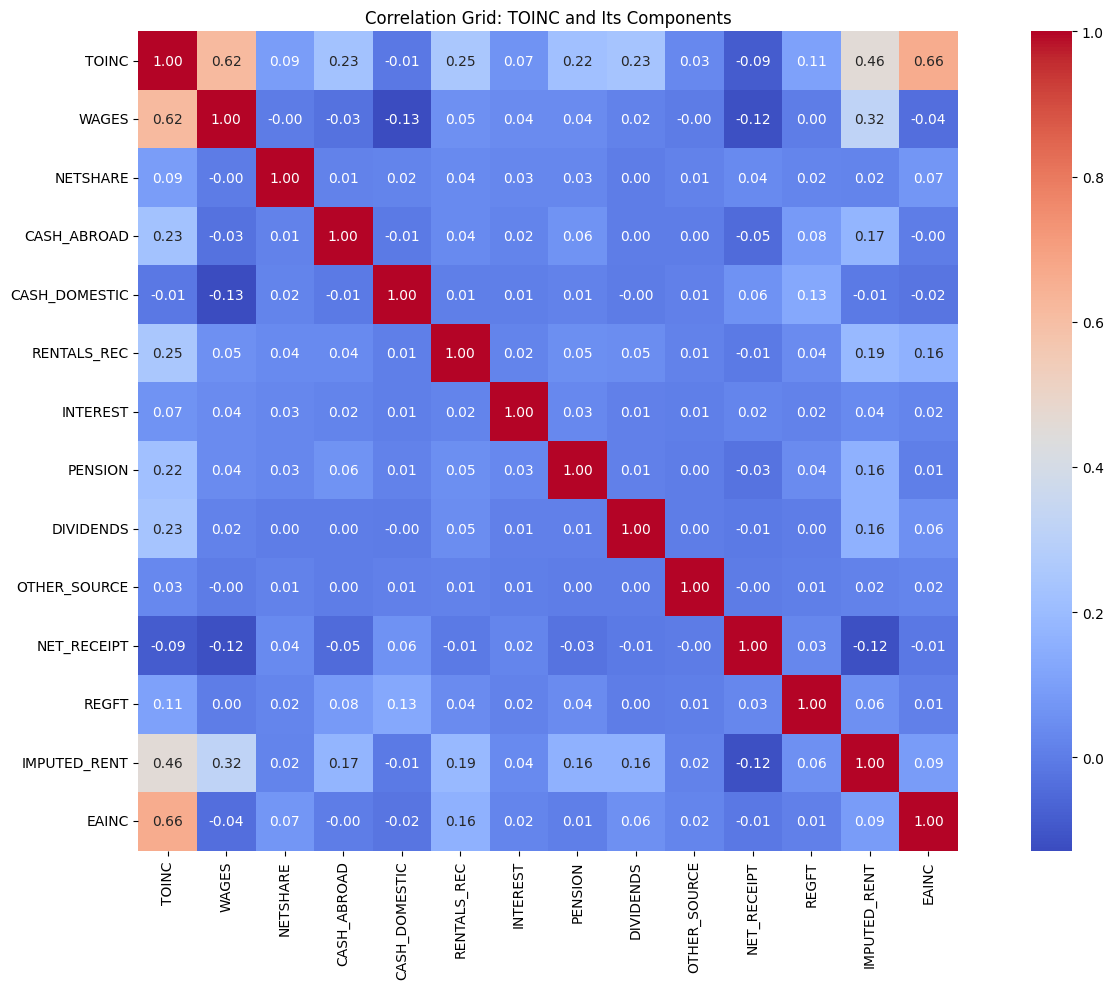

In [37]:
# Define the aggregated column and its components
aggregated_col = 'TOINC'
components_list = TOINC_components

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list)


> Based on the Heatmap Correlation, `EAINC` or the Total Income from Entrepreneurial Activities has the most impact (0.66) followed by Wages (0.62) and imputed_rent (0.46)

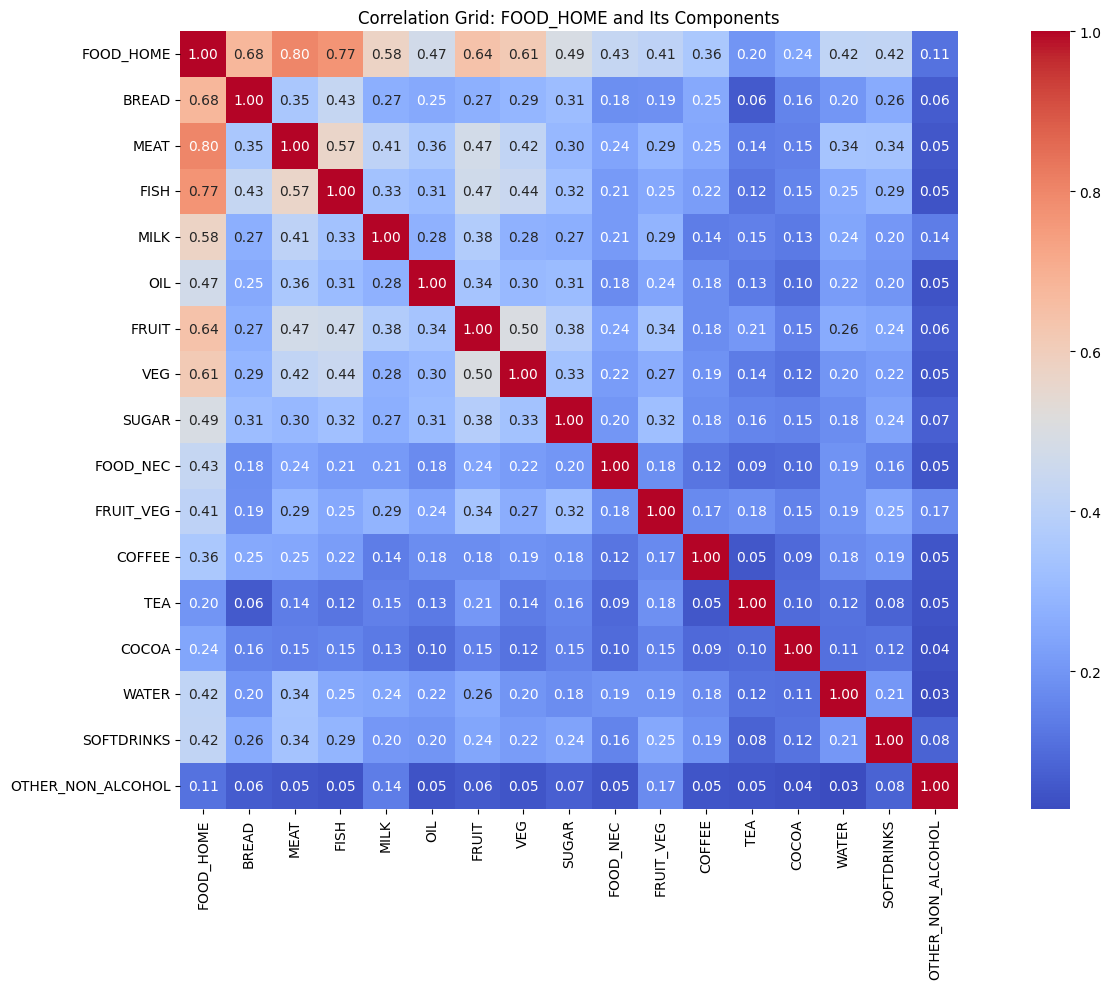

In [38]:
# Define the aggregated column and its components
aggregated_col = 'FOOD_HOME'
components_list = FOOD_HOME_components

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list)


> The top 3 Products that have the most contribution in the Food Expenses at home are **Meat, Fish, and Bread** respectively. Other notable food products are Fruit, Vegetables, and Sugar.

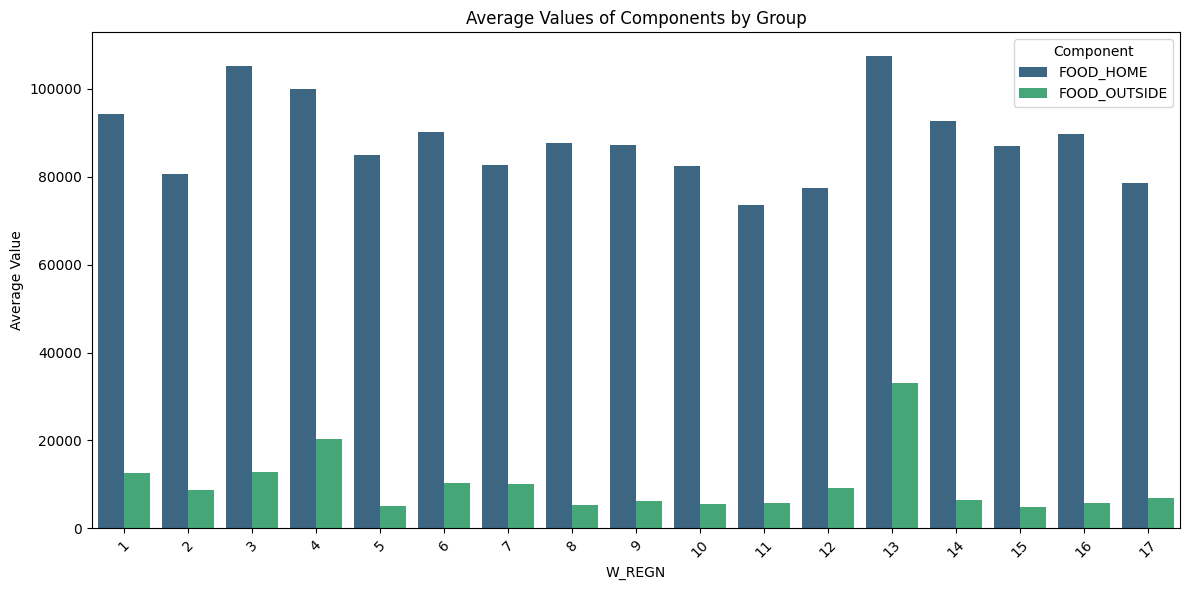

In [39]:
# Define the aggregated column and its components
aggregated_col = 'FOOD'
components_list = FOOD_components

# Call the function
plot_grouped_bar_chart_average(cleaned_fies, components_list, group_by_column='W_REGN')


> Based on the Bar Chart, NCR (W_REGN 13) has the highest average value for the FOOD_HOME and FOOD_OUTSIDE. NCR is followed by the Central Luzon (W_REGN 3) and CALABARZON (W_REGN 4) in the highest FOOD_HOME expenses respectively.

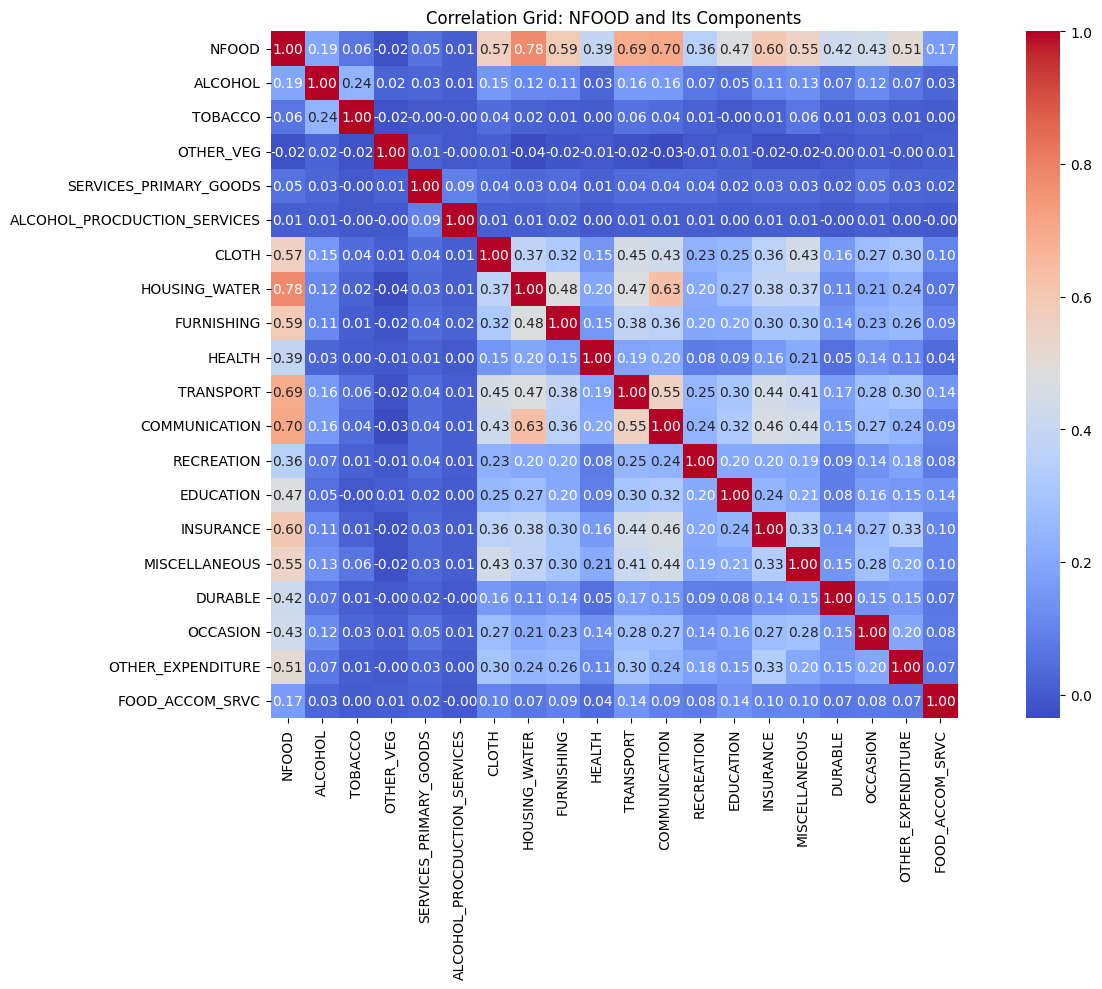

In [40]:
# Define the aggregated column and its components
aggregated_col = 'NFOOD'
components_list = NFOOD_components

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list)


> The Top 3 Highest non-food expenses are HOUSING_WATER `(0.78)`, Communication `(0.70)`, and Transport `(0.69)` respectively. Other notable factors include Insurance, Furnishing, and Miscellenaeous Goods and Services 

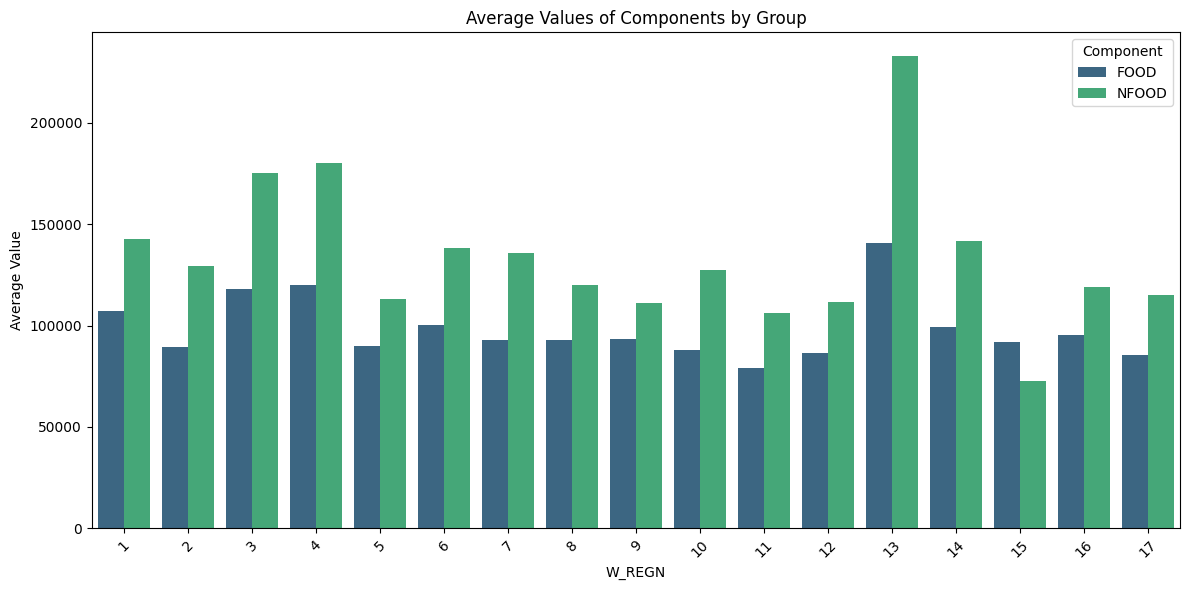

In [41]:
# Define the aggregated column and its components
aggregated_col = 'TOTEX'
components_list = TOTEX_components

# Call the function
plot_grouped_bar_chart_average(cleaned_fies, components_list, group_by_column='W_REGN')


> Based on the Bar Chart, Non-Food Expenses are generally higher than Food Expenses across all regions. Furthermore, NCR (W_REGN 13) significantly has the highest average Food and Non-Food Expenses, followed by CALABARZON (W_REGN 4) and Central Luzon (W_REGN 3) respectively. 

#### C. Data Wrangling

In [42]:
final_df = cleaned_fies.copy()

In [43]:
final_df.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [44]:
final_df.drop(columns=Wages_components, inplace=True)
final_df.drop(columns=EAINC_components, inplace=True)
final_df.drop(columns=TOINC_components, inplace=True)
final_df.drop(columns=FOOD_HOME_components, inplace=True)
final_df.drop(columns=FOOD_components, inplace=True)
final_df.drop(columns=NFOOD_components, inplace=True)
final_df.drop(columns=TOTEX_components, inplace=True)

# Drop Other Unnecessary Columns
final_df.drop(columns=[
    'RPROV', 'ACTRENT', 'BIMPUTED_RENT', 'RENTVAL',
    'RPSU', 'RFACT', 'MEM_RFACT', 'NPCINC', 
    'RPCINC', 'PRPCINC', 'PPCINC', 'RPCINC_NIR', 
    'W_REGN_NIR'
], inplace=True)


In [45]:
final_df.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'FSIZE', 'OTHER_DISBURSEMENT', 'TOINC',
       'TOTEX', 'TOTDIS', 'OTHREC', 'TOREC', 'URB', 'PERCAPITA'],
      dtype='object')

In [46]:
# Standardize Column Names
final_df.rename(
    columns={
        "W_REGN": "REGION",
        "W_PROV": "PROVINCE",
        "SEQ_NO": "FAMILY_ID",
        "FSIZE": "FAMILY_SIZE",
        "NETSHARE": "NET_SHARE",
        "OTHER_SOURCE": "OTHER_INCOME_SOURCE",
        "REGFT": "GIFT_RECEIPTS",
        "EAINC": "ENTREP_INCOME",
        "FOOD": "FOOD_EXPENSES",
        "NFOOD": "NON_FOOD_EXPENSES",
        "TOINC": "TOTAL_INCOME",
        "TOTEX": "TOTAL_EXPENSES",
        "TOTDIS": "TOTAL_DISBURSEMENTS",
        "OTHREC": "OTHER_RECEIPTS",
        "TOREC": "TOTAL_RECEIPTS",
        "URB": "AREA_CLASS",
        "PERCAPITA": "PCAPITA_INCOME",
    },
    inplace=True,
)

> Since each row represents a unique household identified by the FAMILY_ID, we will set `FAMILY_ID` as the index for the DataFrame.

In [47]:
# Set 'FAMILY_ID' as the index
final_df.set_index('FAMILY_ID', inplace=True)
final_df.head()


,REGION,PROVINCE,FAMILY_SIZE,OTHER_DISBURSEMENT,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,AREA_CLASS,PCAPITA_INCOME
FAMILY_ID,,,,,,,,,,,
1,1,28,2.5,0,607070.0,228942.0,228942.0,0,607070.0,2,242828.000000
2,1,28,6.0,600,411980.0,363077.0,363677.0,0,411980.0,2,68663.335938
3,1,28,3.5,42709,818212.0,516477.0,559186.0,0,818212.0,2,233774.859375
4,1,28,2.5,0,258538.0,180438.0,180438.0,0,258538.0,2,103415.203125
5,1,28,3.0,46524,550724.0,390438.0,436962.0,2000,552724.0,2,183574.671875


In [48]:
final_df.shape

(163268, 11)

In [49]:
final_df.columns

Index(['REGION', 'PROVINCE', 'FAMILY_SIZE', 'OTHER_DISBURSEMENT',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME'],
      dtype='object')

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163268 entries, 1 to 163268
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REGION               163268 non-null  int64  
 1   PROVINCE             163268 non-null  int64  
 2   FAMILY_SIZE          163268 non-null  float64
 3   OTHER_DISBURSEMENT   163268 non-null  int64  
 4   TOTAL_INCOME         163268 non-null  float64
 5   TOTAL_EXPENSES       163268 non-null  float64
 6   TOTAL_DISBURSEMENTS  163268 non-null  float64
 7   OTHER_RECEIPTS       163268 non-null  int64  
 8   TOTAL_RECEIPTS       163268 non-null  float64
 9   AREA_CLASS           163268 non-null  int64  
 10  PCAPITA_INCOME       163268 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 14.9 MB


In [76]:
final_df.describe()

,REGION,PROVINCE,FAMILY_SIZE,OTHER_DISBURSEMENT,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,AREA_CLASS,PCAPITA_INCOME,NET_SAVINGS,TOTAL_EXPENSES_RATIO,FOOD_EXPENSES_RATIO,NON_FOOD_EXPENSES_RATIO,SAVINGS_RATIO,PCAPITA_EXPENSES,PCAPITA_FOOD_EXPENSES,PCAPITA_NON_FOOD_EXPENSES
count,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163267.000000,163267.000000,163268.000000,1.632680e+05,163267.000000,1.632670e+05
mean,9.343821,45.666328,4.135504,2.743421e+04,3.321473e+05,2.431553e+05,2.705896e+05,1.010574e+04,3.422530e+05,1.524383,9.530256e+04,8.899193e+04,0.775418,0.554150,0.706320,0.201778,6.949186e+04,32600.562724,4.655577e+04
std,4.753706,24.759798,1.966900,1.752157e+05,4.060651e+05,1.956257e+05,3.047673e+05,1.090443e+05,4.406249e+05,0.499407,1.585432e+05,2.867755e+05,0.172671,0.399133,0.857812,0.180266,6.991334e+04,30345.815655,7.368391e+04
min,1.000000,1.000000,1.000000,0.000000e+00,1.403000e+04,1.396700e+04,1.396700e+04,0.000000e+00,1.403000e+04,1.000000,5.240000e+03,-5.174102e+06,0.030208,0.004615,0.003939,-0.975394,4.822957e+03,636.750000,7.388485e+02
25%,5.000000,24.000000,3.000000,0.000000e+00,1.625390e+05,1.317518e+05,1.361298e+05,0.000000e+00,1.665800e+05,1.000000,4.226207e+04,1.390855e+04,0.660357,0.304938,0.316389,0.075003,3.420192e+04,14984.500000,1.422123e+04
50%,10.000000,46.000000,4.000000,0.000000e+00,2.410800e+05,1.913252e+05,2.007561e+05,0.000000e+00,2.475255e+05,2.000000,6.552517e+04,4.242638e+04,0.793798,0.468173,0.496844,0.186095,5.151429e+04,23675.000000,2.639833e+04
75%,13.000000,70.000000,5.000000,1.299000e+04,3.894780e+05,2.931411e+05,3.157221e+05,1.500000e+03,3.983600e+05,2.000000,1.094002e+05,1.025976e+05,0.903661,0.686360,0.807530,0.321653,8.138962e+04,38844.125000,5.156683e+04
max,17.000000,98.000000,23.500000,3.704800e+07,8.246120e+07,8.707474e+06,4.250419e+07,2.644000e+07,8.666120e+07,2.000000,4.123060e+07,7.700501e+07,1.970622,10.918707,53.150419,0.959260,5.484391e+06,537398.580000,4.110284e+06


#### D. Feature Engineering

Classifying incomes into different social classes based on the defined thresholds

*References*
- https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidsdps2022.pdf
- https://psa.gov.ph/statistics/poverty

In [51]:
poverty_threshold = 13873 * 12  # Official poverty threshold (PSA, 2023)

def classify_income(row):
    total_income = row['TOTAL_INCOME']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

final_df['SOCIAL_CLASS'] = final_df.apply(classify_income, axis=1)
print(final_df[['TOTAL_INCOME', 'SOCIAL_CLASS']].head())


           TOTAL_INCOME         SOCIAL_CLASS
FAMILY_ID                                   
1              607070.0  Lower-middle income
2              411980.0  Lower-middle income
3              818212.0        Middle income
4              258538.0           Low income
5              550724.0  Lower-middle income


Calculates the net savings for each individual by subtracting their total expenses (`TOTAL_EXPENSES`) from their total income (`TOTAL_INCOME`) and stores the result in a new column called `NET_SAVINGS` in the `cleaned_fies` DataFrame.

In [52]:
final_df['NET_SAVINGS'] = final_df['TOTAL_INCOME'] - final_df['TOTAL_EXPENSES']

In [53]:
final_df['TOTAL_EXPENSES_RATIO'] = final_df['TOTAL_EXPENSES'] / final_df['TOTAL_RECEIPTS']
final_df['FOOD_EXPENSES_RATIO'] = cleaned_fies['FOOD'] / final_df['TOTAL_EXPENSES']
final_df['NON_FOOD_EXPENSES_RATIO'] = cleaned_fies['NFOOD'] / final_df['TOTAL_EXPENSES']
final_df['SAVINGS_RATIO'] = final_df['NET_SAVINGS'] / final_df['TOTAL_RECEIPTS']
final_df['PCAPITA_EXPENSES'] = final_df['TOTAL_EXPENSES'] / final_df['FAMILY_SIZE']
final_df['PCAPITA_FOOD_EXPENSES'] = cleaned_fies['FOOD'] / final_df['FAMILY_SIZE']
final_df['PCAPITA_NON_FOOD_EXPENSES'] = cleaned_fies['NFOOD'] / final_df['FAMILY_SIZE']

In [54]:
final_df.shape

(163268, 20)

In [55]:
final_df.columns

Index(['REGION', 'PROVINCE', 'FAMILY_SIZE', 'OTHER_DISBURSEMENT',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME',
       'SOCIAL_CLASS', 'NET_SAVINGS', 'TOTAL_EXPENSES_RATIO',
       'FOOD_EXPENSES_RATIO', 'NON_FOOD_EXPENSES_RATIO', 'SAVINGS_RATIO',
       'PCAPITA_EXPENSES', 'PCAPITA_FOOD_EXPENSES',
       'PCAPITA_NON_FOOD_EXPENSES'],
      dtype='object')

In [56]:
cleaned_fies.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.343821,45.666328,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,1.625567e+04,2.087703e+03,261.068783,8.917411e+03,9.279524e+02,334.375260,3147.782842,6.229320e+03,1.349645e+04,2.298986e+03,4.626744e+03,387.405021,2.544389e+04,2.398009e+03,6.584374e+03,5.824782e+03,3.672963e+02,3.758046e+02,6.181191e+04,8.169978,27286.062891,16053.257366,14394.006695,6144.197778,1712.811002,4601.016959,7037.525935,2141.598779,4130.657394,711.642792,2217.816260,122.737804,438.272914,1900.274496,1187.452304,79.535181,1279.174387,1983.709162,67.003924,19.450805,1.171387,9.015887e+04,11548.751406,1.017076e+05,4.900740e+03,5.409333e+04,3.653566e+03,2.801967e+04,8.943057e+01,3.176266e+04,6.315285e+03,6.971786e+03,1.581311e+04,7888.639139,1.988345e+03,8.202996e+03,6376.147353,9065.431358,5.097815e+03,6275.710347,4.889744e+03,2.743421e+04,218.148829,1.414477e+05,3.321473e+05,2.431553e+05,2.705896e+05,1.010574e+04,3.422530e+05,573.167081,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,4.753706,24.759798,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,2.991219e+04,2.482738e+04,3388.956853,6.055216e+04,6.751070e+04,5839.103922,6381.121388,2.155790e+04,4.460068e+04,4.009795e+04,2.985207e+04,5000.560669,2.251064e+05,3.531579e+04,3.467995e+04,8.237168e+04,1.672914e+04,1.802239e+04,2.660405e+05,738.982873,12875.671564,13694.003058,10333.798670,6312.403759,1549.350682,4226.019431,5509.888624,2031.424024,6184.097005,1149.474516,2066.748378,518.245413,1170.879435,2127.917027,1353.817982,550.259214,2686.722445,4540.873882,489.885721,226.289097,68.121341,4.494110e+04,19540.102473,5.493516e+04,7.662093e+03,5.933142e+04,1.790243e+04,4.143742e+04,6.836886e+03,4.422733e+04,1.575241e+04,2.631806e+04,2.123939e+04,8947.522999,9.025928e+03,2.421281e+04,17194.193854,10490.738724,3.698498e+04,13899

##### Feature Engineering Visualizations

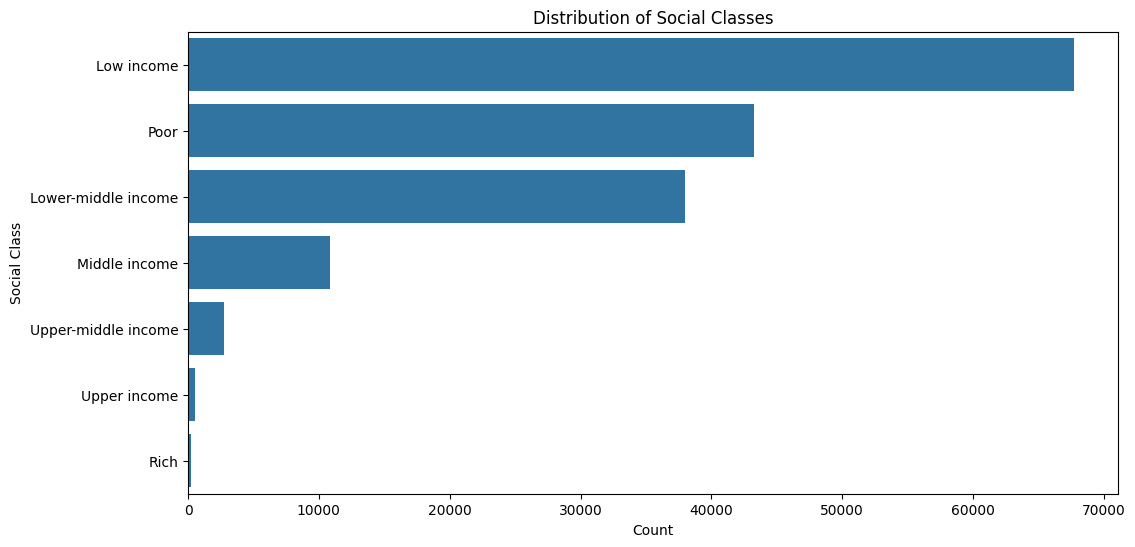

In [57]:
# 1. Distribution of Social Classes
plt.figure(figsize=(12, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=final_df,
    order=final_df["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Distribution of Social Classes")
plt.xlabel("Count")
plt.ylabel("Social Class")
plt.show()


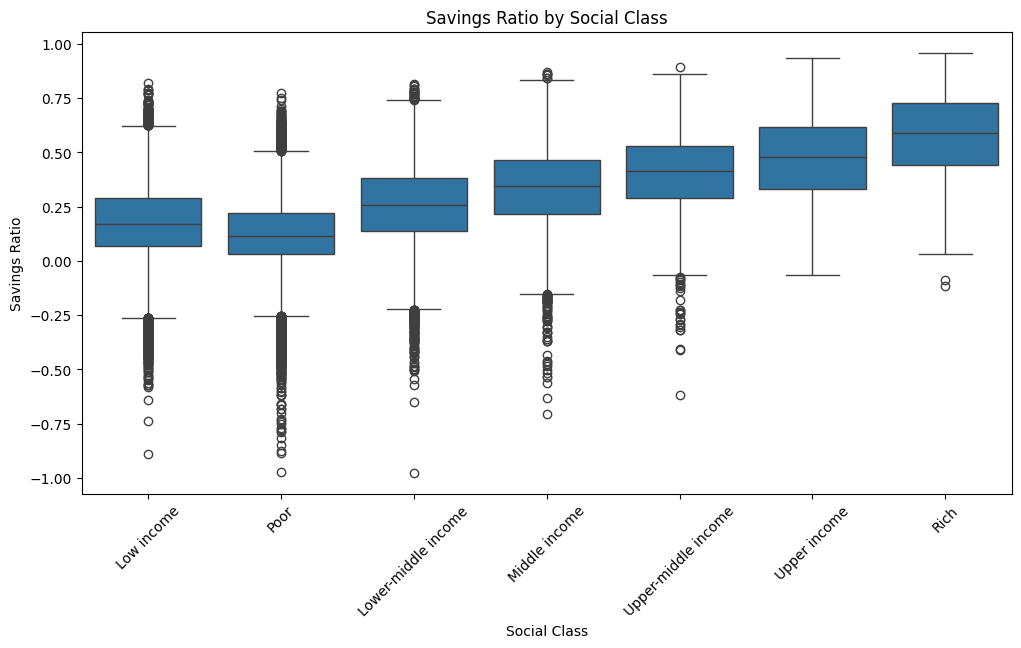

In [58]:
# 2. Savings Ratio by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="SAVINGS_RATIO",
    data=final_df,
    order=final_df["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Savings Ratio by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Savings Ratio")
plt.xticks(rotation=45)
plt.show()

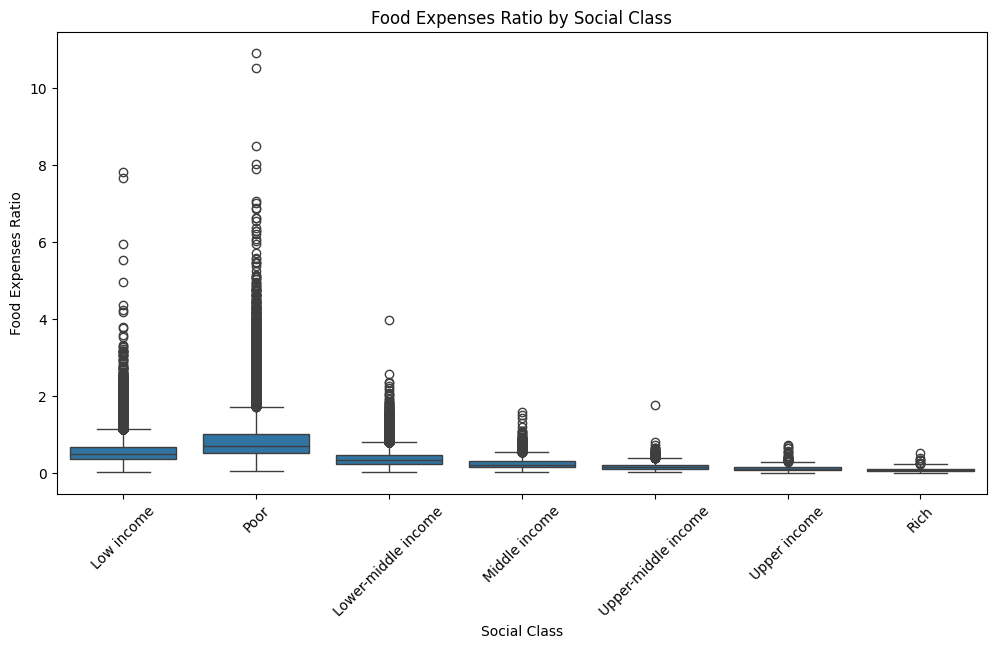

In [59]:
# 3. Food Expenses Ratio by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="FOOD_EXPENSES_RATIO",
    data=final_df,
    order=final_df["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Food Expenses Ratio by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Food Expenses Ratio")
plt.xticks(rotation=45)
plt.show()

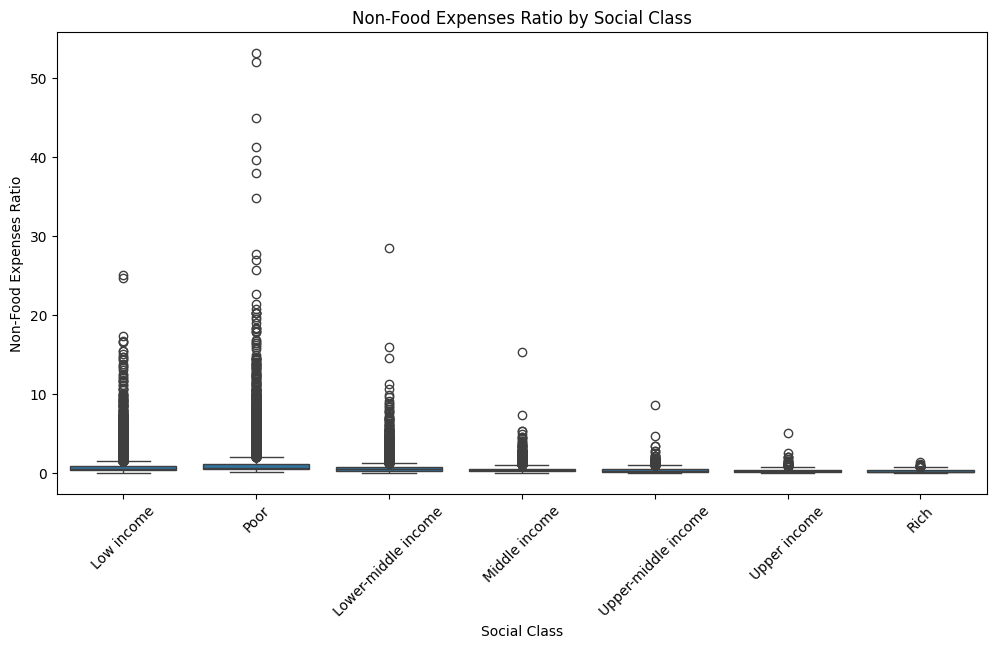

In [60]:
# 4.5 Non-food Expenses Ratio by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="NON_FOOD_EXPENSES_RATIO",
    data=final_df,
    order=final_df["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Non-Food Expenses Ratio by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Non-Food Expenses Ratio")
plt.xticks(rotation=45)
plt.show()


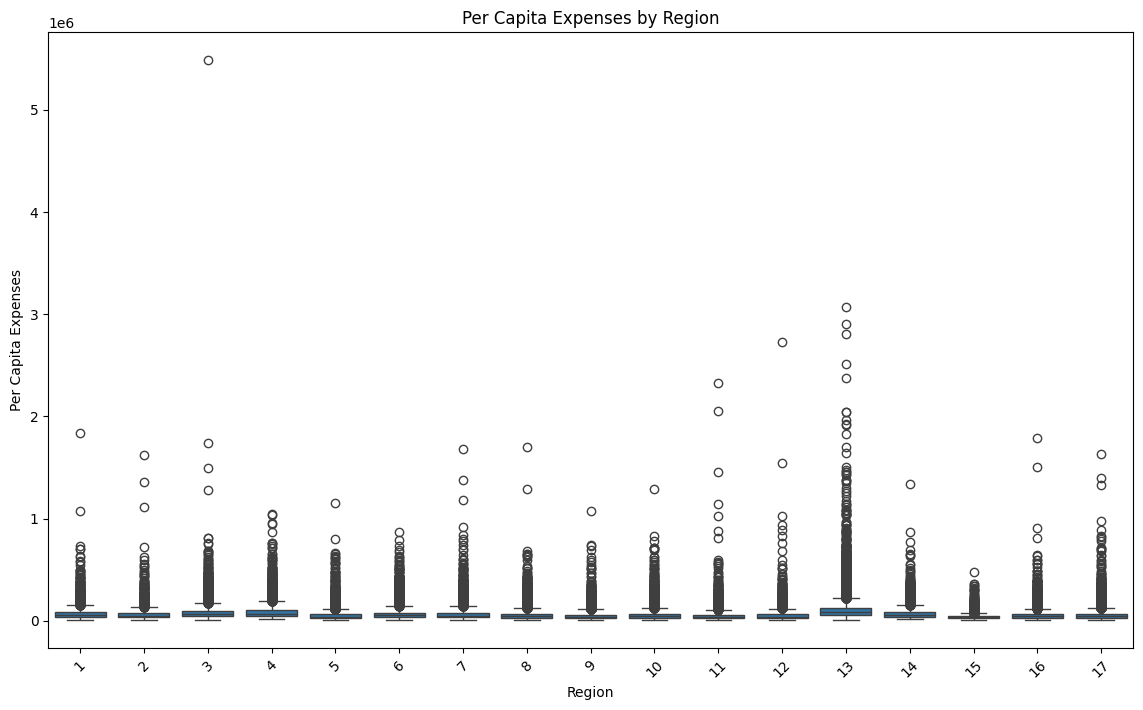

In [61]:
# 5. Per Capita Expenses by Region
plt.figure(figsize=(14, 8))
sns.boxplot(x="REGION", y="PCAPITA_EXPENSES", data=final_df)
plt.title("Per Capita Expenses by Region")
plt.xlabel("Region")
plt.ylabel("Per Capita Expenses")
plt.xticks(rotation=45)
plt.show()

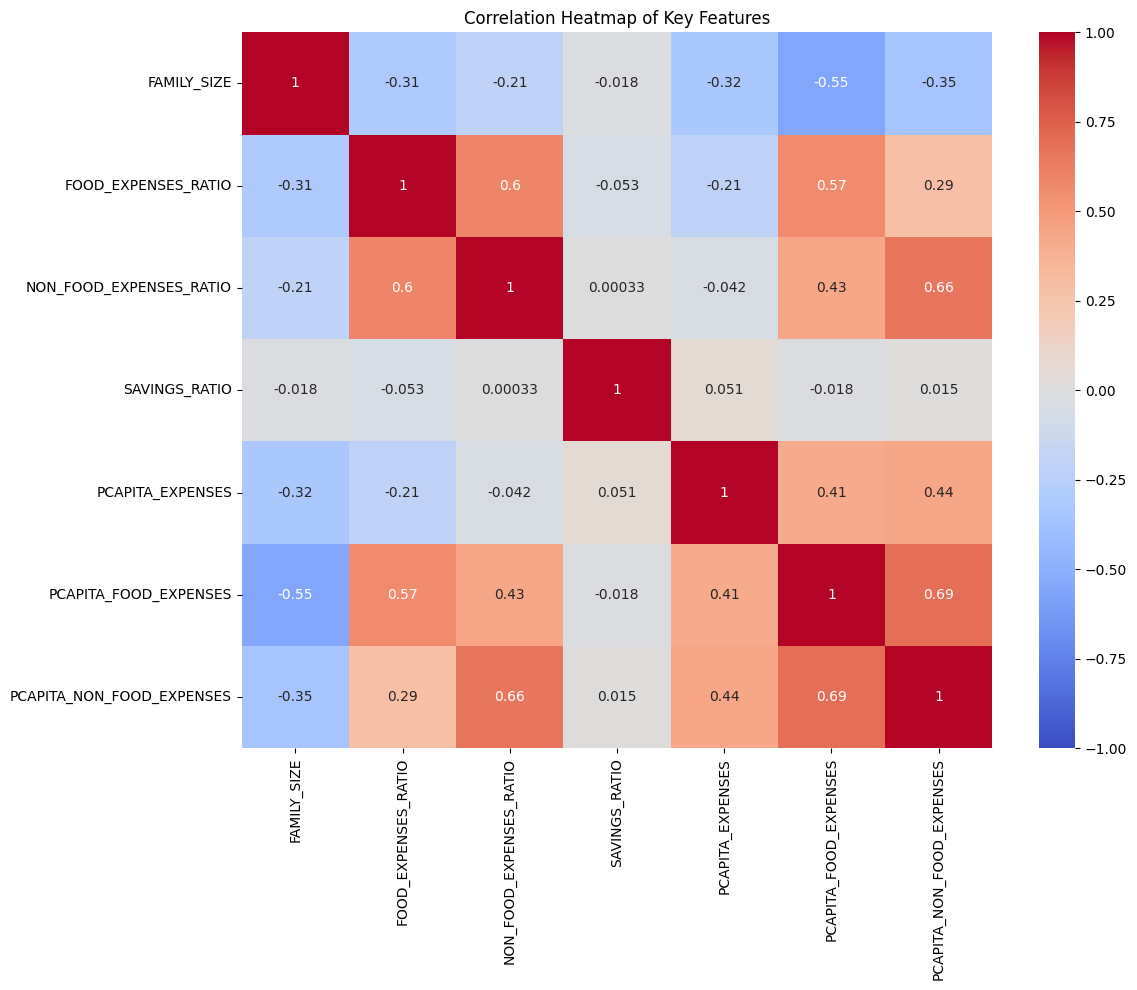

In [62]:
# 6. Correlation Heatmap
correlation_features = [
    "FAMILY_SIZE",
    "FOOD_EXPENSES_RATIO",
    "NON_FOOD_EXPENSES_RATIO",
    "SAVINGS_RATIO",
    "PCAPITA_EXPENSES",
    "PCAPITA_FOOD_EXPENSES",
    "PCAPITA_NON_FOOD_EXPENSES",
]
correlation_matrix = final_df[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Key Features")
plt.tight_layout()
plt.show()


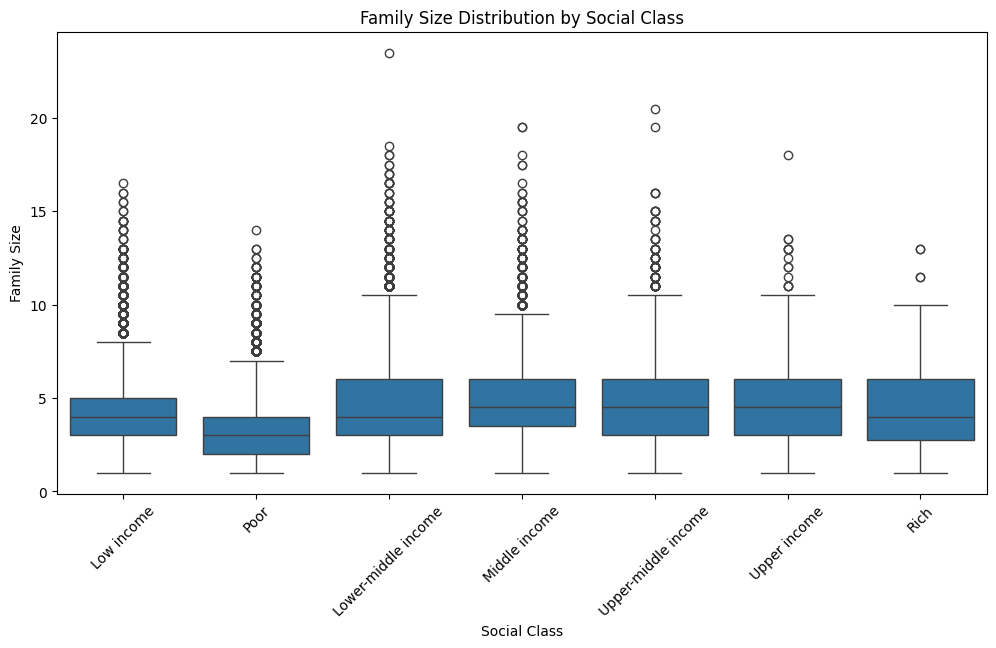

In [63]:
# 8. Family Size Distribution by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="FAMILY_SIZE",
    data=final_df,
    order=final_df["SOCIAL_CLASS"].value_counts().index,
)
plt.title("Family Size Distribution by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Family Size")
plt.xticks(rotation=45)
plt.show()

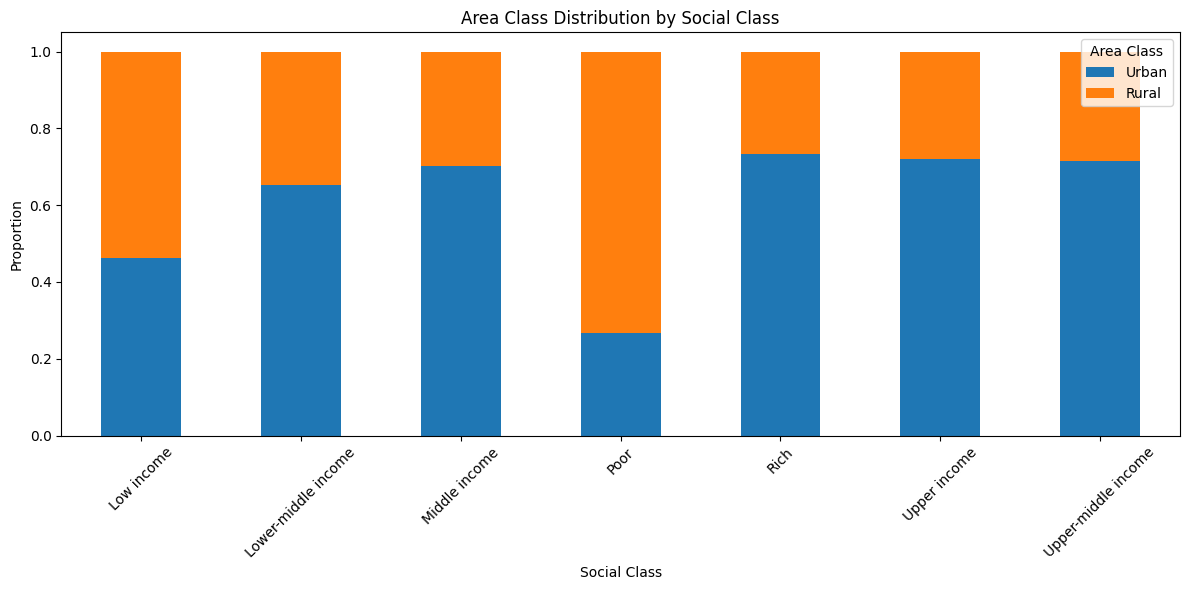

In [64]:
# 9. Area Class Distribution by Social Class
area_class_dist = final_df.groupby('SOCIAL_CLASS')['AREA_CLASS'].value_counts(normalize=True).unstack()
area_class_dist.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Area Class Distribution by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Proportion')
plt.legend(title='Area Class', labels=['Urban', 'Rural'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

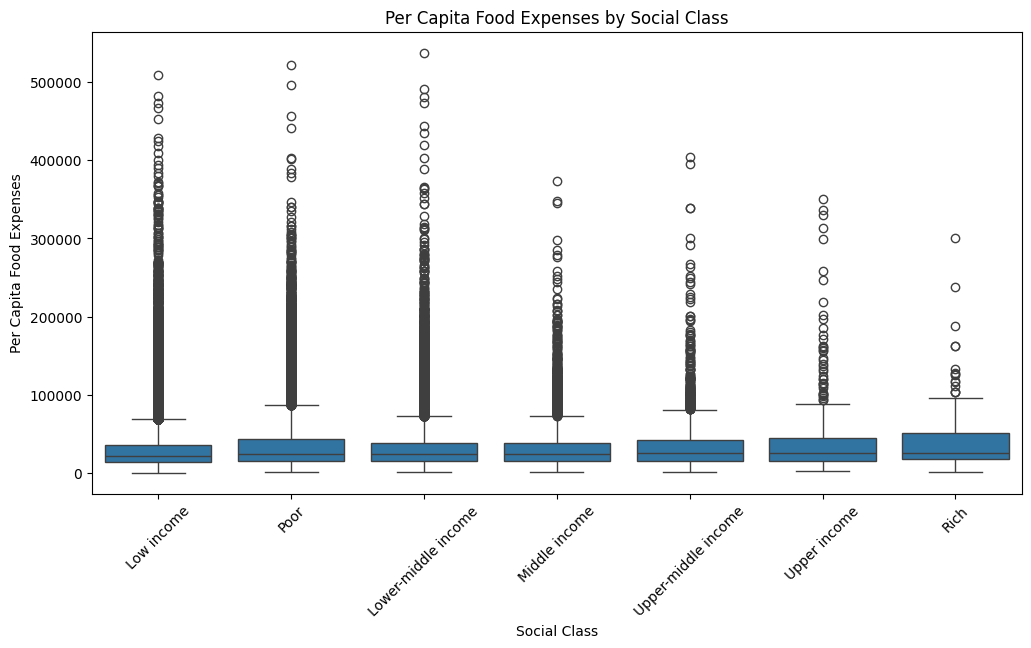

In [65]:
# 10. Per Capita Food Expenses by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='SOCIAL_CLASS', y='PCAPITA_FOOD_EXPENSES', data=final_df, order=final_df['SOCIAL_CLASS'].value_counts().index)
plt.title('Per Capita Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Per Capita Food Expenses')
plt.xticks(rotation=45)
plt.show()

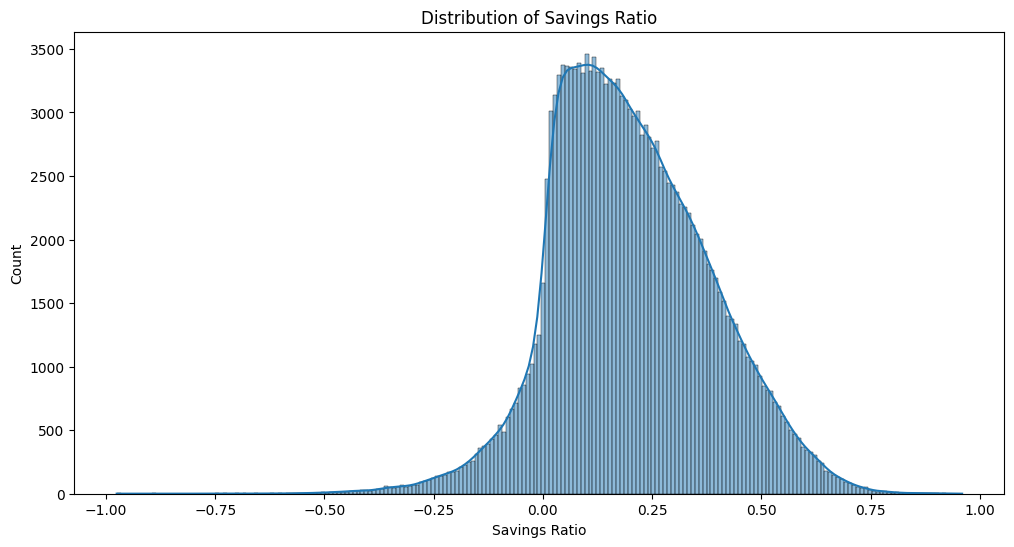

In [66]:
# 11. Savings Ratio Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='SAVINGS_RATIO', kde=True)
plt.title('Distribution of Savings Ratio')
plt.xlabel('Savings Ratio')
plt.ylabel('Count')
plt.show()

---
### III. Supervised Machine Learning Model

In [67]:
features = ['FAMILY_SIZE', 'FOOD_EXPENSES_RATIO', 'NON_FOOD_EXPENSES_RATIO', 
            'SAVINGS_RATIO', 'PCAPITA_EXPENSES', 'PCAPITA_FOOD_EXPENSES', 
            'PCAPITA_NON_FOOD_EXPENSES', 'AREA_CLASS', 'REGION', 'PROVINCE']

In [68]:
X = final_df[features]
y = final_df['SOCIAL_CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
y.value_counts()

SOCIAL_CLASS
Low income             67700
Poor                   43265
Lower-middle income    37991
Middle income          10858
Upper-middle income     2715
Upper income             548
Rich                     191
Name: count, dtype: int64

In [71]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', 
                                   classes=np.unique(y_train), 
                                   y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

#Train improved model with class weights

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'class_weight': class_weight_dict,
        'random_state': 42
    }

    rf_model = RandomForestClassifier(**params)

    rf_model.fit(X_train_scaled, y_train)

    y_pred = rf_model.predict(X_test_scaled)

    return f1_score(y_test, y_pred, average='weighted')


study = optuna.create_study(direction='maximize', study_name='Random Forest Optimization', storage='sqlite:///rf_study.db', load_if_exists=True)
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('F1 Score: {}'.format(trial.value))




[I 2024-12-13 20:48:09,956] Using an existing study with name 'Random Forest Optimization' instead of creating a new one.
[I 2024-12-13 20:49:05,253] Trial 12 finished with value: 0.8850226300457995 and parameters: {'n_estimators': 218, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.9501721715712451.
[I 2024-12-13 20:51:54,648] Trial 13 finished with value: 0.9503536051665614 and parameters: {'n_estimators': 485, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 13 with value: 0.9503536051665614.
[W 2024-12-13 20:52:08,933] Trial 14 failed with parameters: {'n_estimators': 484, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\edjin\AppD

KeyboardInterrupt: 

In [72]:
print(study.best_params)

{'n_estimators': 485, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 1}


In [73]:
trial = study.best_trial

#rf_model = RandomForestClassifier(**trial.params)
rf_model = RandomForestClassifier(
    n_estimators= 478, 
    max_depth= 28, 
    min_samples_split=5, 
    min_samples_leaf=1,
    class_weight = class_weight_dict,
    random_state=42
    )


rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy

Classification Report:
                     precision    recall  f1-score   support

         Low income       0.95      0.97      0.96     13552
Lower-middle income       0.94      0.95      0.95      7607
      Middle income       0.89      0.87      0.88      2158
               Poor       0.98      0.96      0.97      8651
               Rich       0.84      0.61      0.71        44
       Upper income       0.67      0.41      0.51       107
Upper-middle income       0.80      0.71      0.75       535

           accuracy                           0.95     32654
          macro avg       0.87      0.78      0.82     32654
       weighted avg       0.95      0.95      0.95     32654



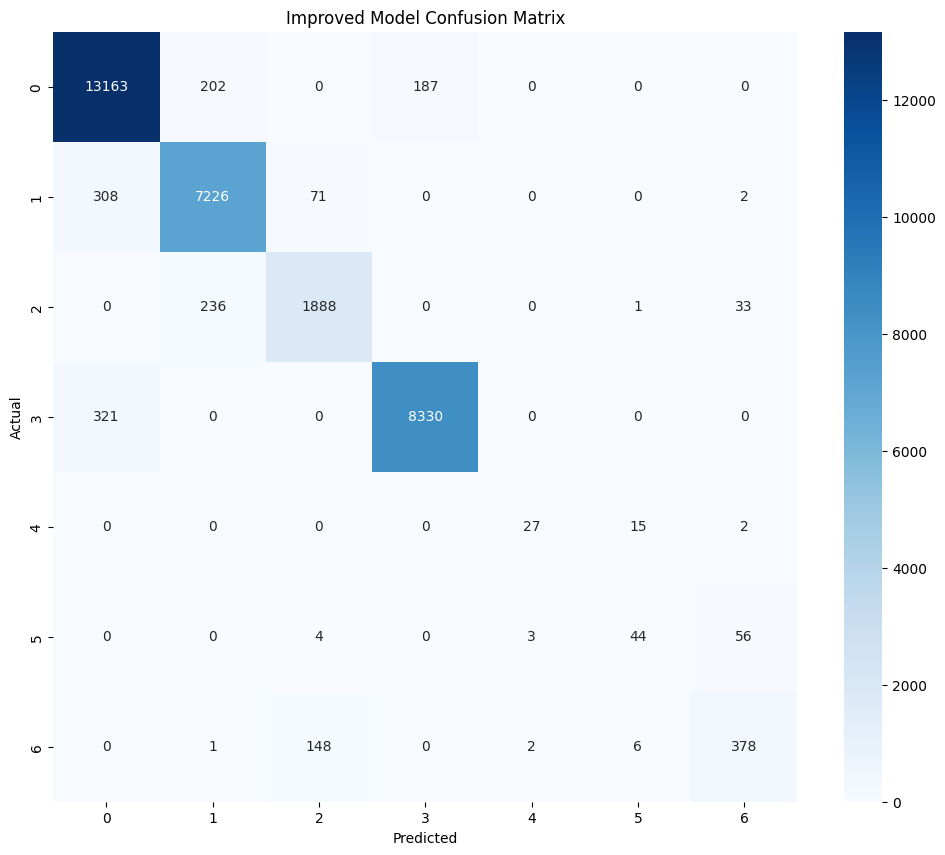

In [74]:
# 1. Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Improved Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


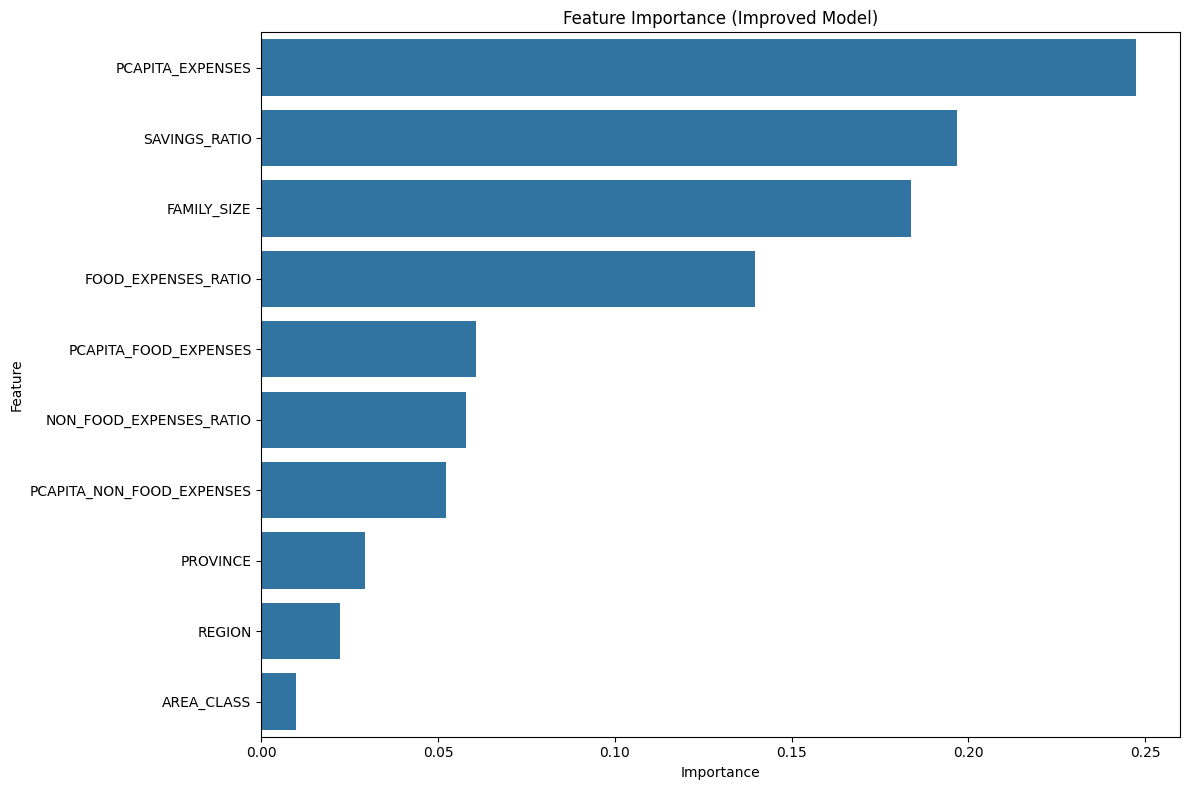

In [75]:
# 2. Feature Importance
feature_importance = pd.DataFrame(
    {"feature": features, "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance)
plt.title("Feature Importance (Improved Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


---
### IV. Recommendations